In [6]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import matplotlib.animation as animation

In [7]:
from os import listdir

In [12]:
pwd

'/home/pau/Desktop/PhD_research/HotIPs/smoking_hot_inverse_problems'

In [17]:
files = sorted(listdir('../data'))

In [18]:
M_list = [np.array([i[:-1] for i in np.loadtxt('../data/'+fi, delimiter = ',', dtype = str)]).astype(float) for fi in files]

In [19]:
M = np.array(M_list).reshape(10,10,9,10,10)

......

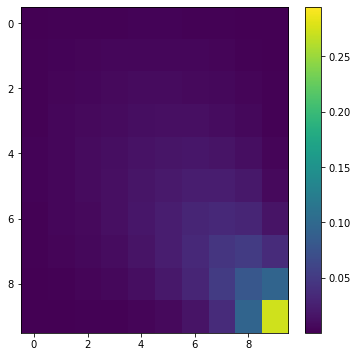

In [20]:
%matplotlib inline
fig = plt.figure(figsize=(6,6));
a = M[4,6,0]
im = plt.imshow(a, interpolation='none', aspect='auto');
plt.colorbar()
fps = 10
fps = 2
def animate_func(i):
    if i % fps == 0:
        print( '.', end ='')
    im.set_array(M[9,9,i]);
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = M.shape[2],
                               interval = M.shape[2] / fps, # in ms
                               );
HTML(anim.to_jshtml())

In [21]:
#Suppose the true source is (3,7) and that we have sensors everywhere at the last time

In [22]:
source = (3,7)
True_measurements = M[source[0],source[1], -1,:,:]

In [23]:
def accuracy(sigma):

    noise = np.random.multivariate_normal(mean = [0]*100, cov = sigma**2*np.eye(100)).reshape(10,10) #scale = sigma

    data = True_measurements + noise

    np.mean(True_measurements)

    prior = 1/100 * np.ones((10,10))

    def weighted_norm(W_inv, x):
        return x.T@W_inv@x

    W_inv = 1/sigma**2 *np.eye(100) 

    posterior = np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            #Compute prob(data|source is in (i,j))
            posterior[i,j] = np.exp(-1/2 * weighted_norm(W_inv, np.reshape(data-M[i,j,-1,:,:], -1)))
    s = np.sum(posterior)
    posterior /= s

    return posterior[3,7]

In [24]:
from tqdm.notebook import tqdm as t

In [25]:
results = np.zeros((500, 100))
for k in t(range(500)):
    lds = []
    for i in np.linspace(0.01,1,100):
        lds.append(accuracy(i))
    results[k] = lds

  0%|          | 0/500 [00:00<?, ?it/s]

Text(0, 0.5, 'True source recovery accuracy')

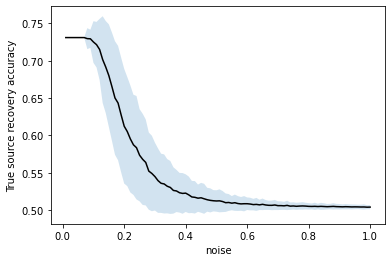

In [31]:
f = lambda x: 1/(1+np.exp(-x))
x = np.linspace(0.01,1,100)
y = np.mean(f(results), axis = 0)
err = np.std(f(results), axis =0)
plt.fill_between(x, y-err, y+err, alpha = 0.2)
plt.plot(x, y, c = 'black')
plt.xlabel('noise')
plt.ylabel('True source recovery accuracy')

''

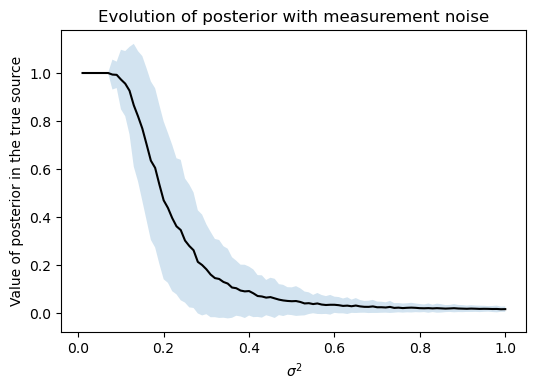

In [37]:
plt.figure(dpi = 100)
x = np.linspace(0.01,1,100)
y = np.mean(results, axis = 0)
err = np.std(results, axis =0)

plt.fill_between(x, y-err, y+err, alpha = 0.2)
plt.plot(x, y, c = 'black')
plt.xlabel(r'$\sigma^2$')
plt.ylabel('Value of posterior in the true source')
plt.title('Evolution of posterior with measurement noise')
;